In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from betareg import Beta  #Taken from https://gist.github.com/brentp/089c7d6d69d78d26437f
import statsmodels.api as sm

In [6]:
df8=pd.read_pickle("Data/df8.pickle")
df8.columns = df8.columns.str.strip()\
                         .str.lower()\
                         .str.replace('+','plus')\
                         .str.replace('^','')\
                         .str.replace(' ', '_')\
                         .str.replace('[', '')\
                         .str.replace(']', '')\
                         .str.replace('/', '')\
                         .str.replace('_mgl','')

df8.columns = df8.columns.str.replace('salinity_gl','s')\
                         .str.replace('temperature','t')

In [7]:
outMetals=df8.columns[df8.columns.str.contains('outin')]
outMetals=outMetals[~outMetals.str.contains('|'.join(['al','li']))]

In [15]:
for metal in outMetals:
    print(df8[metal].min(),df8[metal].median(),df8[metal].mean(),df8[metal].max())

0.24528301886792453 0.4314277668262462 0.5257908570355769 0.9950248756218907
0.6226415094339622 0.7452830188679245 0.7452830188679245 0.8679245283018868
0.45283018867924524 0.5786515535529897 0.6388517319065052 0.945273631840796
0.12437810945273634 0.2580376419787853 0.2556322162771051 0.38207547169811323
0.16981132075471697 0.6736600018774055 0.6081385525204168 0.9154228855721395
0.0 0.03482587064676618 0.03482587064676618 0.06965174129353235
0.23880597014925375 0.5 0.5 0.7611940298507464


In [20]:
############################################################################################
for metal in outMetals:
    
    print("#=========== {} ================".format(metal))
    print("def "+metal[:2]+"Out0(P):")
    print("    return {}".format(df8[metal].mean()))
    print("")
    print("def "+metal[:2]+"Out(P):")
    print("    return np.random.triangular({},{},{})".format(df8[metal].min(),df8[metal].median(),df8[metal].max()))
    print("")

#=========== sr_outin_ratio ================
def srOut0(P):
    return 0.5257908570355769

def srOut(P):
    return np.random.triangular(0.24528301886792453,0.4314277668262462,0.9950248756218907)

#=========== mn_outin_ratio ================
def mnOut0(P):
    return 0.7452830188679245

def mnOut(P):
    return np.random.triangular(0.6226415094339622,0.7452830188679245,0.8679245283018868)

#=========== ba_outin_ratio ================
def baOut0(P):
    return 0.6388517319065052

def baOut(P):
    return np.random.triangular(0.45283018867924524,0.5786515535529897,0.945273631840796)

#=========== as_outin_ratio ================
def asOut0(P):
    return 0.2556322162771051

def asOut(P):
    return np.random.triangular(0.12437810945273634,0.2580376419787853,0.38207547169811323)

#=========== zn_outin_ratio ================
def znOut0(P):
    return 0.6081385525204168

def znOut(P):
    return np.random.triangular(0.16981132075471697,0.6736600018774055,0.9154228855721395)

#=========== rb_

In [21]:
#=========== sr_outin_ratio ================
def srOut0(P):
    return 0.5257908570355769

def srOut(P):
    return np.random.triangular(0.24528301886792453,0.4314277668262462,0.9950248756218907)

#=========== mn_outin_ratio ================
def mnOut0(P):
    return 0.7452830188679245

def mnOut(P):
    return np.random.triangular(0.6226415094339622,0.7452830188679245,0.8679245283018868)

#=========== ba_outin_ratio ================
def baOut0(P):
    return 0.6388517319065052

def baOut(P):
    return np.random.triangular(0.45283018867924524,0.5786515535529897,0.945273631840796)

#=========== as_outin_ratio ================
def asOut0(P):
    return 0.2556322162771051

def asOut(P):
    return np.random.triangular(0.12437810945273634,0.2580376419787853,0.38207547169811323)

#=========== zn_outin_ratio ================
def znOut0(P):
    return 0.6081385525204168

def znOut(P):
    return np.random.triangular(0.16981132075471697,0.6736600018774055,0.9154228855721395)

#=========== rb_outin_ratio ================
def rbOut0(P):
    return 0.03482587064676618

def rbOut(P):
    return np.random.triangular(0.0,0.03482587064676618,0.06965174129353235)

#=========== ni_outin_ratio ================
def niOut0(P):
    return 0.5

def niOut(P):
    return np.random.triangular(0.23880597014925375,0.5,0.7611940298507464)

In [22]:
for metal in outMetals:
    m=metal[:2]
    fun0=globals()[m+'Out0']
    df8[metal+'_model']=df8.apply(lambda row: fun0(row), axis=1)
    try:
        fun=globals()[m+'Out']
        df8[[m+'2p3',m+'15p9',m+'84p1',m+'97p7']]=df8.apply(lambda row: pd.Series(np.round(np.percentile([fun(row) for i in range(1000)],[2.3,15.9,84.1,97.7]),1)),axis=1)
    except KeyError:
        df8[[m+'2p3',m+'15p9',m+'84p1',m+'97p7']]=df8.apply(lambda row: np.nan,axis=1)
                
    df8[metal+'_model_error']=df8[m+'_outin_ratio_model']-df8[m+'_outin_ratio']

sr_outin_ratio
0    0.245283
1    0.415094
2    0.447761
3    0.995025
Name: sr_outin_ratio, dtype: float64
mn_outin_ratio
0    0.622642
1    0.867925
2         NaN
3         NaN
Name: mn_outin_ratio, dtype: float64
ba_outin_ratio
0    0.452830
1    0.580189
2    0.577114
3    0.945274
Name: ba_outin_ratio, dtype: float64
as_outin_ratio
0    0.297170
1    0.382075
2    0.124378
3    0.218905
Name: as_outin_ratio, dtype: float64
zn_outin_ratio
0    0.169811
1    0.471698
2    0.915423
3    0.875622
Name: zn_outin_ratio, dtype: float64
rb_outin_ratio
0         NaN
1         NaN
2    0.000000
3    0.069652
Name: rb_outin_ratio, dtype: float64
ni_outin_ratio
0         NaN
1         NaN
2    0.238806
3    0.761194
Name: ni_outin_ratio, dtype: float64


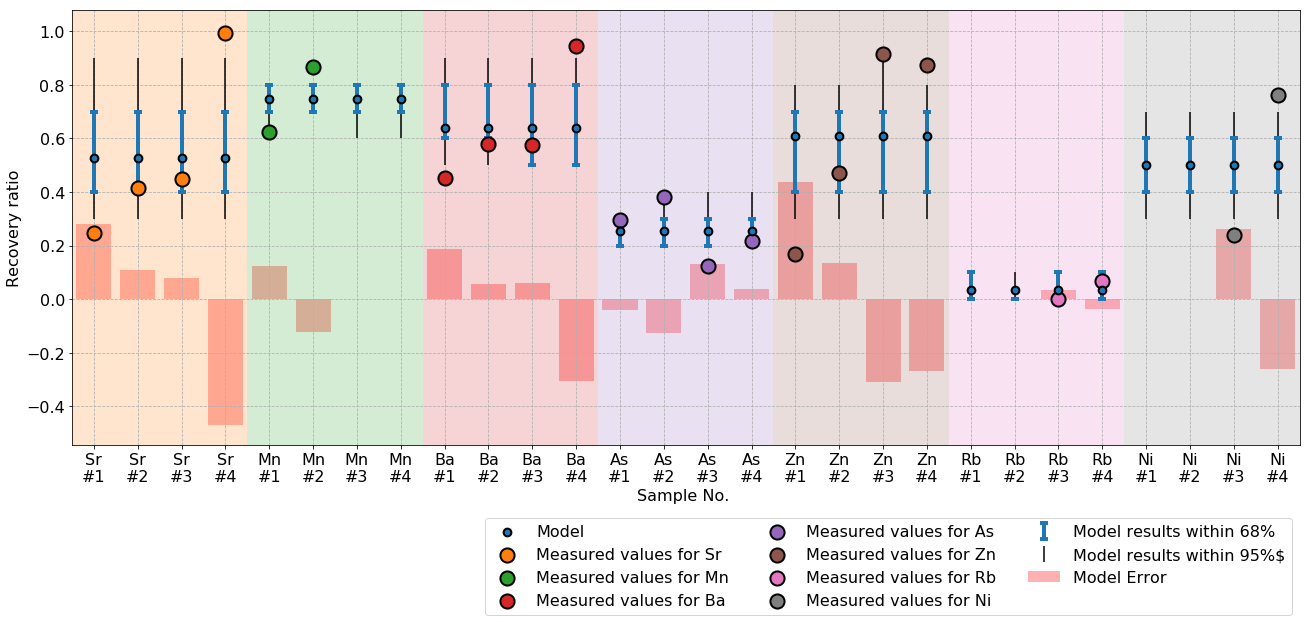

In [23]:
plt.rcParams.update({'font.size': 16})
fig,ax=plt.subplots(figsize=(22,8))
i=1
metalnames=[]
for (n,metal) in enumerate(outMetals):
    m    =metal[:2]
    data =df8[metal]
    error=df8[metal+'_model_error']
    m2p3 =df8[m+'2p3']
    m15p9=df8[m+'15p9']
    m84p1=df8[m+'84p1']
    m97p7=df8[m+'97p7']
    
    model=df8[metal+'_model']
    
    N=len(model)
    print(metal)
    print(data)

    #if ~data.isna().any():
    ax.errorbar(range(i,i+4),
                model.values,
                yerr=np.vstack([model.values-m15p9.values,
                                m84p1.values-model.values]),
                capsize=4,
                capthick=4,
                linewidth=4,
                color='C0',
                fmt ='none',
                zorder=10,
                label='Model results within 68%' if n==0 else '')

    ax.errorbar(range(i,i+4),
                model.values,
                yerr=np.vstack([model.values-m2p3.values,
                                m97p7.values-model.values]),
                capsize=0,
                capthick=2,
                color='black',
                fmt ='none',
                zorder=5,
                label='Model results within 95%$' if n==0 else '')
    ax.axvspan(i-0.5, i+3.5, facecolor='C'+str(n+1), alpha=0.2)
    #else:
    #    ax.axvspan(i-0.5, i+3.5, facecolor='C'+str(n+1), alpha=0.2)
     

    ax.scatter(range(i,i+4),model,color='C0',s=60,edgecolor='k',lw=2,zorder=25,label='Model' if n==0 else '')          
    ax.scatter(range(i,i+4),data,color='C'+str(n+1),s=200,edgecolor='k',lw=2,zorder=20,label='Measured values for ' +metal[0:2].capitalize())   
    ax.bar(range(i,i+4),error,color='red',alpha=0.3,zorder=0,label='Model Error' if n==0 else '') 

    metalnames+=[m.capitalize()+'\n#'+str(i) for i in range(1,5)]
    ax.grid()
    m=metal[:2]
    i+=4
ax.set_xticks(range(1,i));
ax.set_xlim(0.5,4*len(outMetals)+0.5)
ax.set_xticklabels(metalnames);
ax.set_ylabel("Recovery ratio")
ax.set_xlabel("Sample No. ")
ax.grid(linestyle='dashed')
ax.legend(ncol=3,bbox_to_anchor=(1, -0.15))
plt.savefig("GDEx_Romanian_Model.png", bbox_inches='tight')

In [1]:
fig,ax=plt.subplots(7,4,figsize=(15,10),sharex=True)
n=0
for metal in outMetals:
    m=metal[:2]
    fun=globals()[m+'Out']
    for index, row in df8.iterrows():
        try: 
            ax[n//4][n%4].hist([fun(row) for i in range(1000)],20,label=None,alpha=0.6)
            ax[n//4][n%4].axvline(df8[metal].iloc[index],color='C1',label=m.capitalize()+' sample No.'+str(index+1));
            ax[n//4][n%4].axvline(df8[metal+'_model'].iloc[index],color='C0',label=None);
            ax[n//4][n%4].legend(fontsize=10,frameon=False)
        except NameError:
            ax[n//4][n%4].axvline(df8[metal].iloc[index],color='C1',label=m.capitalize()+' sample No.'+str(index+1));
            ax[n//4][n%4].axvline(df8[metal+'_model'].iloc[index],color='C0',label=None);
            ax[n//4][n%4].legend(fontsize=10,frameon=False)
        n+=1
    
for n in range(4*7):
    ax[n//4][n%4].set_yticks([])
    ax[n//4][n%4].set_xlim(0,1)
    ax[n//4][n%4].set_xticks([0,0.5])

plt.tight_layout(pad=-1)
plt.savefig("GEDx_Romanian_Model_histograms.png", bbox_inches='tight')

NameError: name 'plt' is not defined